## Clasificacion de flores iris 

In [1]:
import pandas as pd
import numpy as np
from sklearn import svm, datasets
import matplotlib.pyplot as plt
%matplotlib inline

/home/cesar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/cesar/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [2]:
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [3]:
x = iris.data[:,:2]
y = iris.target

In [9]:
x_min, x_max = x[:,0].min()-1 , x[:,0].max()+1
y_min, y_max = x[:,1].min()-1 , x[:,1].max()+1
h = (x_max-x_min)/100

xx , yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

x_plot = np.c_[xx.ravel(), yy.ravel()]

In [10]:
c=1.
svc = svm.SVC(kernel="linear", C=c, decision_function_shape="ovr").fit(x,y)
ypred = svc.predict(x_plot)
ypred = ypred.reshape(xx.shape)

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel linear')

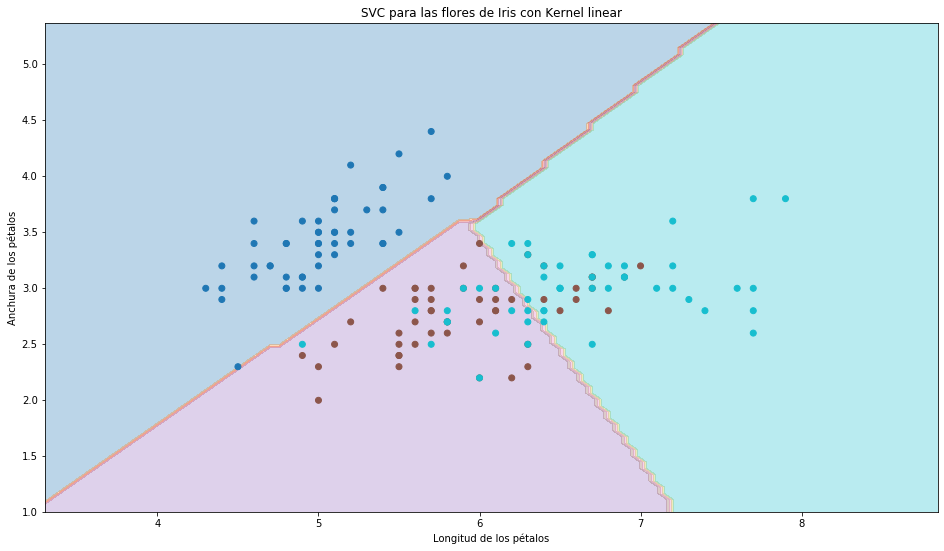

In [15]:
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.xlim(xx.min(),xx.max())
plt.title("SVC para las flores de Iris con Kernel linear")

**Veamos como funciona el con el radio, en vez del lineal**

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel RBF')

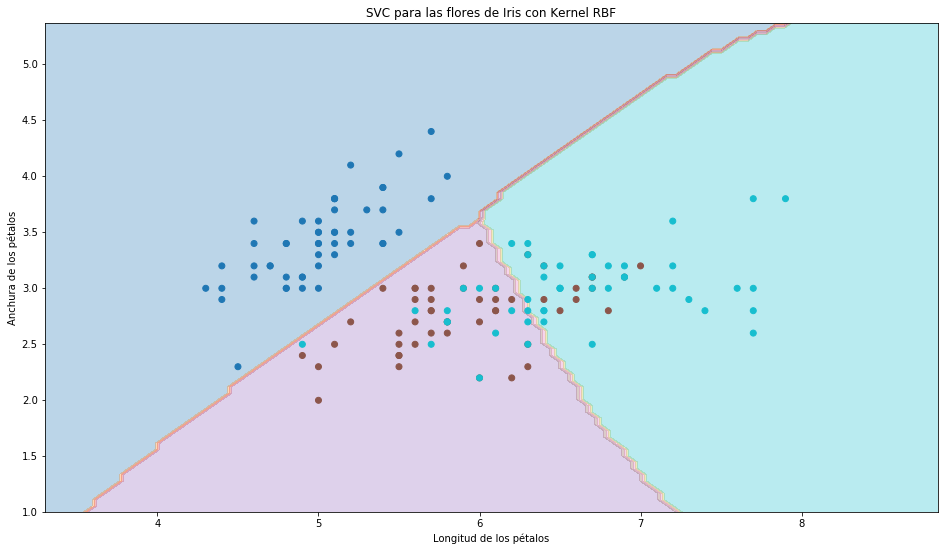

In [17]:
c=1.
svc = svm.SVC( C=c, decision_function_shape="ovr").fit(x,y)
ypred = svc.predict(x_plot)
ypred = ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.title("SVC para las flores de Iris con Kernel RBF")

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel Sigmoide')

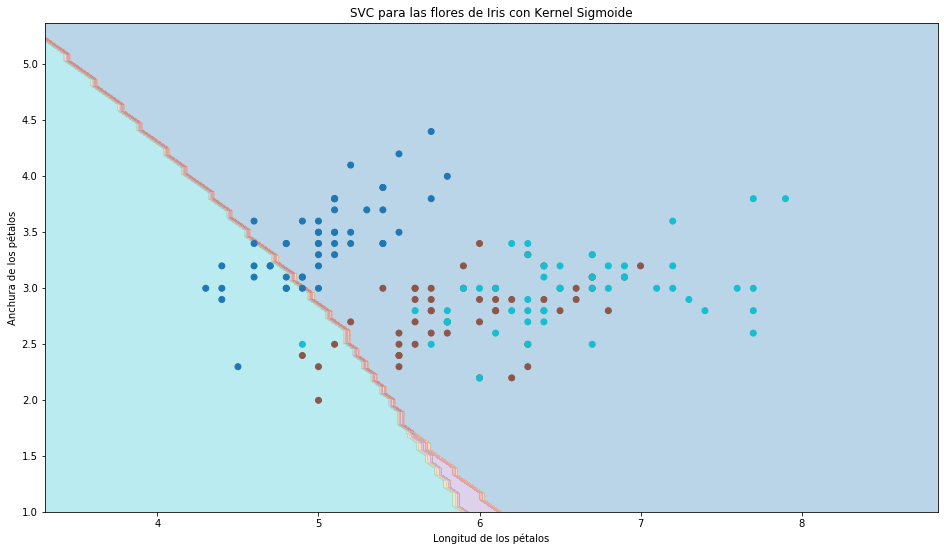

In [18]:
c=1.
svc = svm.SVC(kernel="sigmoid",C=c, decision_function_shape="ovr").fit(x,y)
ypred = svc.predict(x_plot)
ypred = ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.title("SVC para las flores de Iris con Kernel Sigmoide")

Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel polinomial')

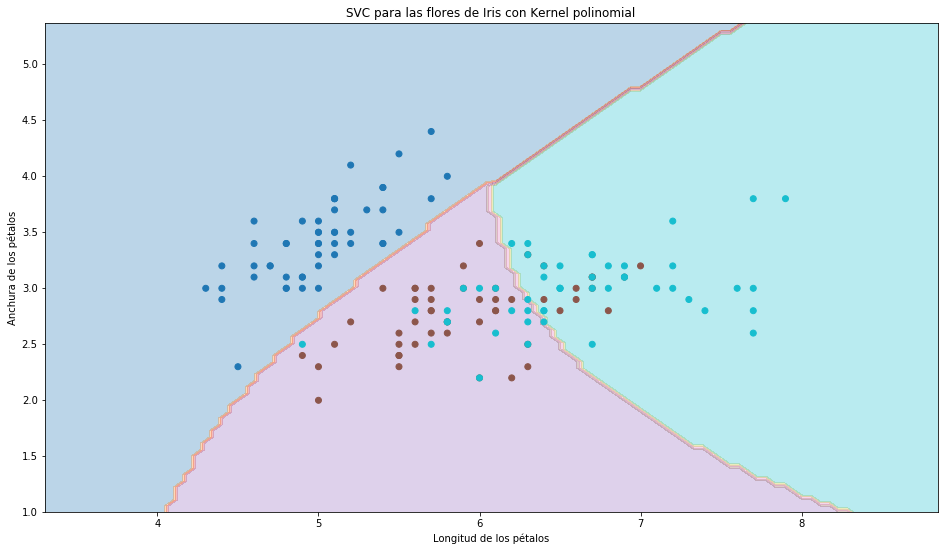

In [19]:
c=1.
svc = svm.SVC( kernel="poly",C=c, decision_function_shape="ovr").fit(x,y)
ypred = svc.predict(x_plot)
ypred = ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.title("SVC para las flores de Iris con Kernel polinomial")

## Veamos cual es el mejor kernel y sus valores 

In [20]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.utils import shuffle

In [21]:
x, y = shuffle(x,y,random_state=0)

In [22]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.25, random_state=0)

In [23]:
parameters  = [
    {
        "kernel": ["rbf"],
        "gamma" : [1e-4,1e-3,1e-2,0.1,0.2,0.3],
        "C"     : [1,10,100,1000]
    },
    {
        "kernel": ["linear"],
        "C"     : [1,10,100,1000]
    }
    
]

In [24]:
clf = GridSearchCV(svm.SVC(decision_function_shape="ovr"), param_grid=parameters,cv=5)
clf.fit(x,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [25]:
clf.best_params_  

{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}

In [27]:
means = clf.cv_results_["mean_test_score"]   #cv =cross valuidation
stds  = clf.cv_results_["std_test_score"]
params = clf.cv_results_["params"]

for m, s , o in zip(means, stds, params):
    print("%0.3f (+- %0.3f) para %r"%(m,2*s,o))

0.747 (+- 0.124) para {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+- 0.124) para {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.747 (+- 0.124) para {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.807 (+- 0.129) para {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.787 (+- 0.124) para {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.780 (+- 0.137) para {'C': 1, 'gamma': 0.3, 'kernel': 'rbf'}
0.747 (+- 0.124) para {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.747 (+- 0.124) para {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.813 (+- 0.124) para {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.773 (+- 0.098) para {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.780 (+- 0.116) para {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.773 (+- 0.098) para {'C': 10, 'gamma': 0.3, 'kernel': 'rbf'}
0.747 (+- 0.124) para {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.813 (+- 0.124) para {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.760 (+- 0.107) para {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.780 (+- 0.080) para {'C': 100, 'gamma'

In [28]:
y_pred = clf.predict(x_test)

In [29]:
print(classification_report(y_test,y_pred,target_names=["setosa","versicolor","virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       0.60      0.82      0.69        11
   virginica       0.83      0.62      0.71        16

    accuracy                           0.79        38
   macro avg       0.81      0.81      0.80        38
weighted avg       0.81      0.79      0.79        38



Text(0.5, 1.0, 'SVC para las flores de Iris con Kernel ideal y componentes ideales')

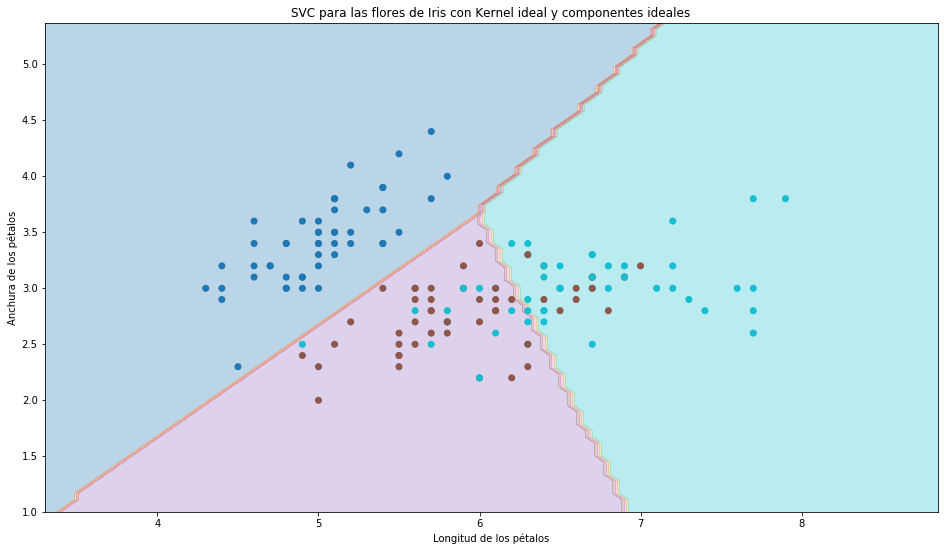

In [30]:
c=10
svc = svm.SVC( kernel="rbf",C=c,gamma=0.01, decision_function_shape="ovr").fit(x,y)
ypred = svc.predict(x_plot)
ypred = ypred.reshape(xx.shape)
plt.figure(figsize=(16,9))
plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10, alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.tab10)
plt.xlabel("Longitud de los pétalos")
plt.ylabel("Anchura de los pétalos")
plt.title("SVC para las flores de Iris con Kernel ideal y componentes ideales")

## Resumen final de la clasificavción de iris.

In [34]:
def svm_iris(c=1.0,gamma=0.01,kernel="rbf"):
    import pandas as pd
    import numpy as np
    from sklearn import svm, datasets
    import matplotlib.pyplot as plt

    iris = datasets.load_iris()
    x = iris.data[:,:2]
    y = iris.target

    x_min, x_max = x[:,0].min()-1 , x[:,0].max()+1
    y_min, y_max = x[:,1].min()-1 , x[:,1].max()+1
    h = (x_max-x_min)/100

    xx , yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

    x_plot = np.c_[xx.ravel(), yy.ravel()]

    svc = svm.SVC( kernel=kernel,C=c,gamma=gamma, decision_function_shape="ovr").fit(x,y)
    ypred = svc.predict(x_plot)
    ypred = ypred.reshape(xx.shape)
    plt.figure(figsize=(16,9))
    plt.contourf(xx,yy,ypred,cmap=plt.cm.tab10, alpha=0.3)
    plt.scatter(x[:,0],x[:,1],c=y,cmap=plt.cm.tab10)
    plt.xlabel("Longitud de los pétalos")
    plt.ylabel("Anchura de los pétalos")
    plt.title("SVC para las flores de Iris con Kernel "+kernel)

In [35]:
from ipywidgets import interact, fixed

In [36]:
interact(svm_iris, c=[0.01,0.1,1,10,100,1000,1e6,1e10],
         gamma = [1e-5,1e-4,1e-3,1e-2,0.1,0.2,0.5,0.99],
        kernel=["rbf","linear","sigmoid","poly"])

interactive(children=(Dropdown(description='c', index=2, options=(0.01, 0.1, 1, 10, 100, 1000, 1000000.0, 1000…

<function __main__.svm_iris(c=1.0, gamma=0.01, kernel='rbf')>